# Analyses, visualisation et préparation des données

In [1]:
from sqlalchemy import create_engine
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Extraction des données depuis les tables sql

### Ouverture de la bdd

In [2]:
# Définition des parametres de connexion Ã  la base de donnÃ©es
username = 'postgres'
password = 'admin'
host = 'localhost'
port = '5432'
dbname = 'preventive_maintenance'

# Configuration de la connexion Ã  la base de donnÃ©es PostgreSQL
connection_str = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{dbname}'
engine = create_engine(connection_str, echo = False)

## statistique de base et Analyse univarié sur les diférentes data

### aeronefs

In [3]:
# Lecture des données dans un dataframe pandas
query = f"""
            SELECT * FROM aeronefs
        """
df_aeronefs = pd.read_sql(query, engine)

In [4]:
df_aeronefs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ref_aero        0 non-null      object
 1   type_model      0 non-null      object
 2   debut_service   0 non-null      object
 3   last_maint      0 non-null      object
 4   en_maintenance  0 non-null      object
 5   end_maint       0 non-null      object
dtypes: object(6)
memory usage: 132.0+ bytes


In [5]:
#conversion des type dans le datafrmae
df_aeronefs['debut_service'] = pd.to_datetime(df_aeronefs['debut_service'])
df_aeronefs['last_maint'] = pd.to_datetime(df_aeronefs['last_maint'])
df_aeronefs['end_maint'] = pd.to_datetime(df_aeronefs['end_maint'])

In [6]:
df_aeronefs.describe().T

,count,mean,min,25%,50%,75%,max
debut_service,0,NaT,NaT,NaT,NaT,NaT,NaT
last_maint,0,NaT,NaT,NaT,NaT,NaT,NaT
end_maint,0,NaT,NaT,NaT,NaT,NaT,NaT


In [7]:
df_aeronefs.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint


#### analyse des distributions

C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1728968041.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=80)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1728968041.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=80)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1728968041.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=80)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1728968041.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

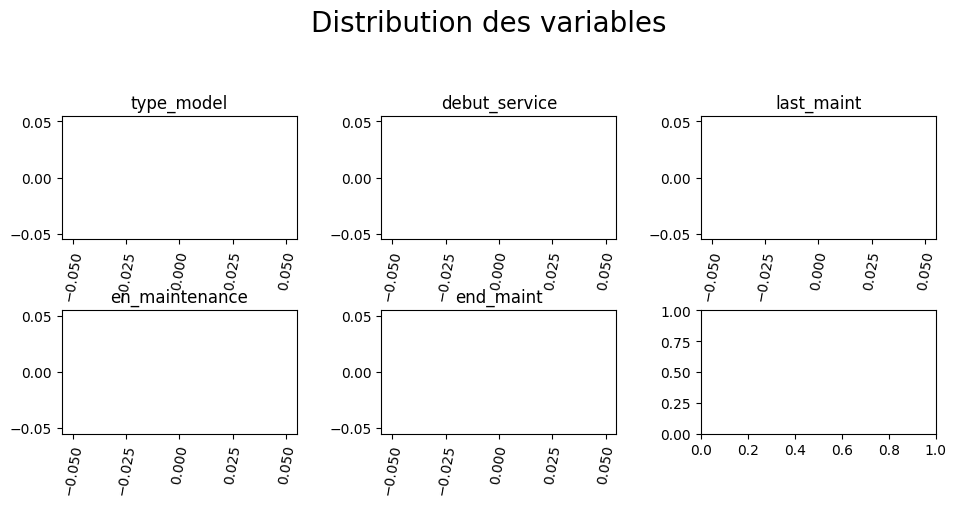

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_aeronefs.columns[1:]):
    sns.histplot(df_aeronefs[col], bins='sturges', kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=80)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')



plt.show()

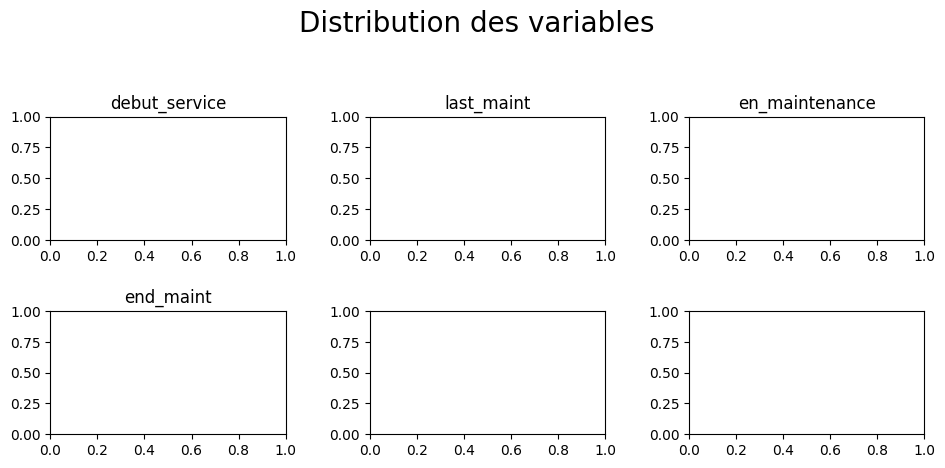

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(df_aeronefs.columns[2:]):
    sns.boxplot(df_aeronefs[col],  ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')

plt.show()

### composants

In [10]:
# Lecture des données dans un dataframe pandas
query = f"""
            SELECT * FROM composants
        """
df_composants = pd.read_sql(query, engine)

In [11]:
df_composants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ref_compo          0 non-null      object
 1   categorie          0 non-null      object
 2   aero               0 non-null      object
 3   desc_compo         0 non-null      object
 4   lifespan           0 non-null      object
 5   taux_usure_actuel  0 non-null      object
 6   cout               0 non-null      object
dtypes: object(7)
memory usage: 132.0+ bytes


In [12]:
df_composants.describe().T

,count,unique,top,freq
ref_compo,0,0,NaN,NaN
categorie,0,0,NaN,NaN
aero,0,0,NaN,NaN
desc_compo,0,0,NaN,NaN
lifespan,0,0,NaN,NaN
taux_usure_actuel,0,0,NaN,NaN
cout,0,0,NaN,NaN


In [13]:
df_composants.head()

,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout


C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\802343125.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\802343125.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\802343125.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\802343125.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

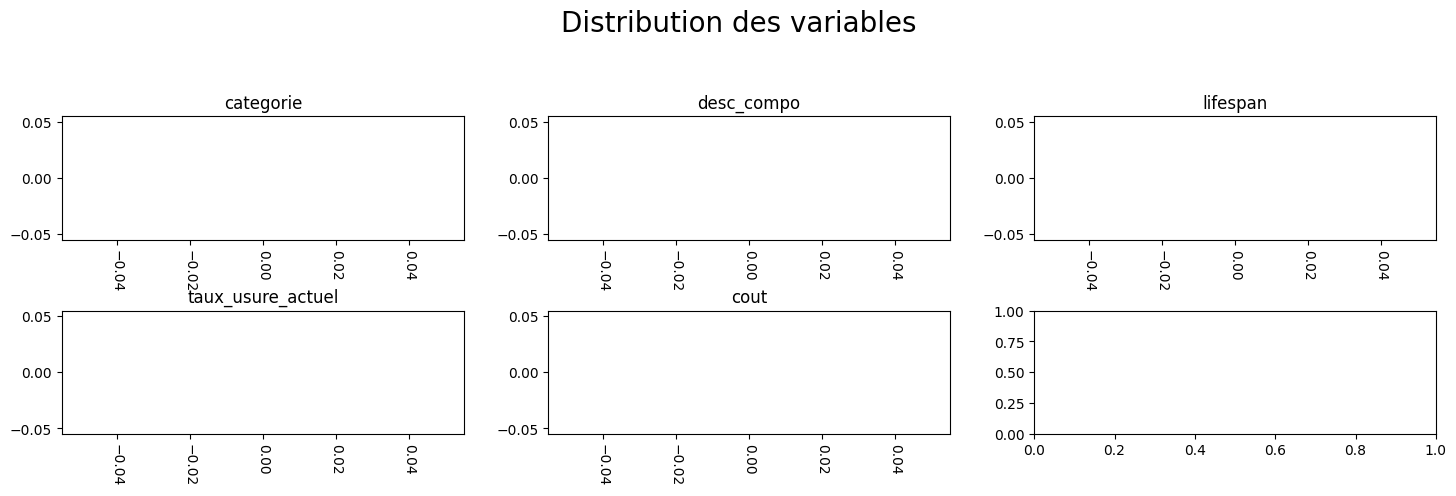

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(['categorie', 'desc_compo', 'lifespan', 'taux_usure_actuel', 'cout']):
    sns.histplot(df_composants[col], bins='sturges', kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')



plt.show()

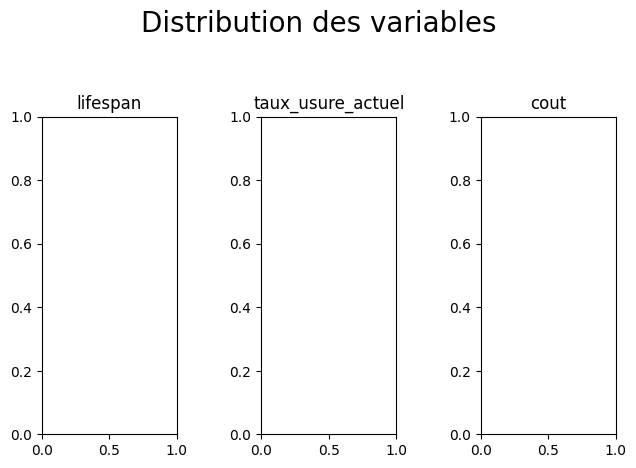

In [15]:
fig2, axes = plt.subplots(1, 3, figsize=(7, 5))
fig2.suptitle('Distribution des variables', fontsize=20)
fig2.tight_layout(pad=3.0)

for i, col in enumerate(['lifespan', 'taux_usure_actuel', 'cout']):
    sns.boxplot(df_composants[col],  ax=axes[i], showfliers=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.show()

### degradations

In [16]:
# Lecture des données dans un dataframe pandas
query = f"""
            SELECT * FROM degradations
        """
df_degradations = pd.read_sql(query, engine)

In [17]:
df_degradations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20925 entries, 0 to 20924
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clef              20925 non-null  object 
 1   ref_deg           20925 non-null  object 
 2   linked_aero       20925 non-null  object 
 3   compo_concerned   20925 non-null  object 
 4   usure_nouvelle    20925 non-null  float64
 5   measure_day       20925 non-null  object 
 6   need_replacement  20925 non-null  bool   
dtypes: bool(1), float64(1), object(5)
memory usage: 1001.4+ KB


In [18]:
#conversion des type dans le datafrmae
df_degradations['measure_day'] = pd.to_datetime(df_degradations['measure_day'])

In [19]:
df_degradations.describe().T

,count,mean,min,25%,50%,75%,max,std
usure_nouvelle,20925.0,38.494213,0.11,23.477008,38.527018,53.548355,100.0,19.019302
measure_day,20925,2024-06-25 06:24:00,2023-07-07 00:00:00,2024-06-02 00:00:00,2024-06-03 00:00:00,2024-07-26 00:00:00,2024-07-26 00:00:00,NaN


In [20]:
df_degradations.head()

,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D003661E170_6353REAE170-E170_6353-02024-06-01,D003661,E170_6353,REAE170-E170_6353-0,53.308375,2024-06-01,False
1,D009402E170_6353REAE170-E170_6353-12024-06-01,D009402,E170_6353,REAE170-E170_6353-1,50.111950,2024-06-01,False
2,D000812E170_6353SYSE170-E170_6353-22024-06-01,D000812,E170_6353,SYSE170-E170_6353-2,16.730575,2024-06-01,False
3,D006665E170_6353ORDE170-E170_6353-32024-06-01,D006665,E170_6353,ORDE170-E170_6353-3,6.653075,2024-06-01,False
4,D001163E170_6353AUTE170-E170_6353-42024-06-01,D001163,E170_6353,AUTE170-E170_6353-4,42.033525,2024-06-01,False


C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1182679995.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1182679995.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1182679995.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90)


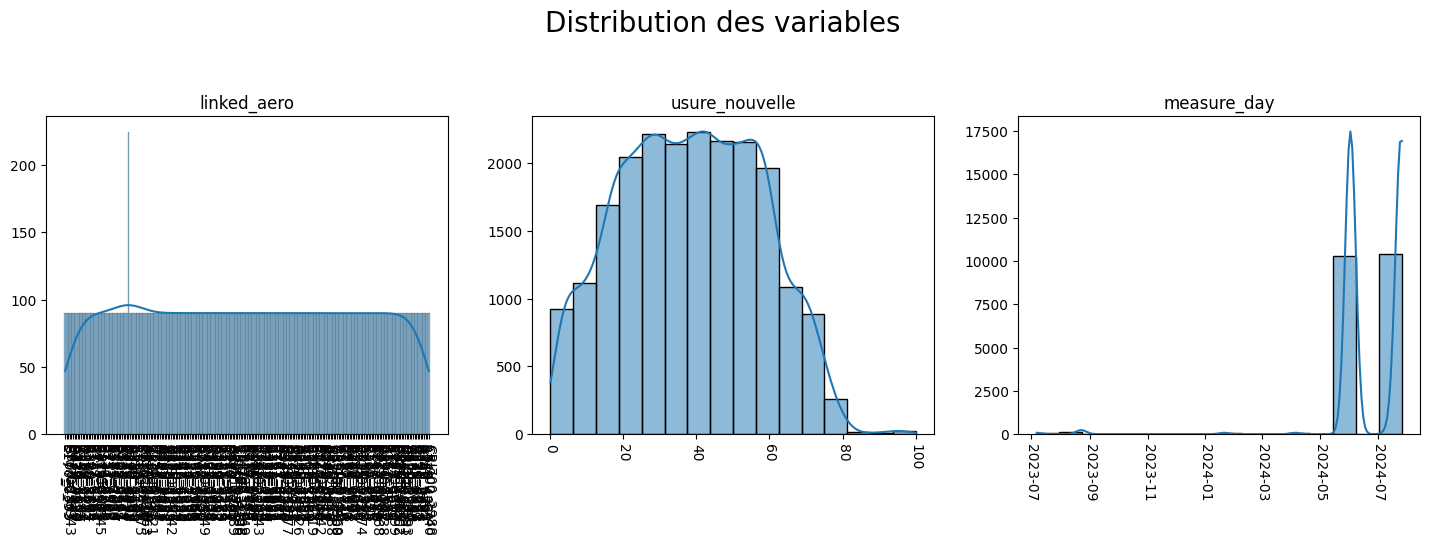

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(['linked_aero', 'usure_nouvelle', 'measure_day']):
    sns.histplot(df_degradations[col], bins='sturges', kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=-90)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.show()

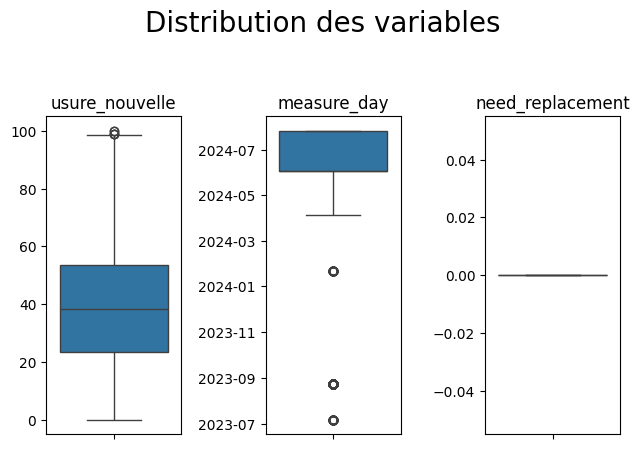

In [22]:
fig2, axes = plt.subplots(1, 3, figsize=(7, 5))
fig2.suptitle('Distribution des variables', fontsize=20)
fig2.tight_layout(pad=3.0)

for i, col in enumerate(['usure_nouvelle', 'measure_day', 'need_replacement']):
    sns.boxplot(df_degradations[col],  ax=axes[i], showfliers=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.show()

### logs_vols

In [23]:
# Lecture des données dans un dataframe pandas
query = f"""
            SELECT * FROM logs_vols
        """
df_logs_vols = pd.read_sql(query, engine)

In [24]:
df_logs_vols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ref_vol                 206 non-null    object 
 1   aero_linked             206 non-null    object 
 2   jour_vol                206 non-null    object 
 3   time_en_air             206 non-null    float64
 4   sensor_data             206 non-null    object 
 5   etat_voyant             206 non-null    int64  
 6   temp                    206 non-null    float64
 7   temp_unit               206 non-null    object 
 8   pressure                206 non-null    float64
 9   pressure_unit           206 non-null    object 
 10  vibrations              206 non-null    float64
 11  vibrations_unit         206 non-null    object 
 12  prediction_etat_voyant  206 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 21.1+ KB


In [25]:
df_logs_vols['jour_vol'] = pd.to_datetime(df_logs_vols['jour_vol'])

In [26]:
df_logs_vols.describe().T

,count,mean,min,25%,50%,75%,max,std
jour_vol,206,2024-07-06 04:32:37.281553408,2024-06-03 00:00:00,2024-06-03 00:00:00,2024-07-26 00:00:00,2024-07-26 00:00:00,2024-07-26 00:00:00,NaN
time_en_air,206.0,4.968447,0.6,3.425,5.0,6.6,11.9,2.295536
etat_voyant,206.0,0.213592,0.0,0.0,0.0,0.0,2.0,0.476788
temp,206.0,-0.369903,-36.1,-6.8,0.5,7.425,25.9,10.679461
pressure,206.0,947.517476,818.8,915.5,944.15,981.625,1074.1,50.081209
vibrations,206.0,2.536199,0.003117,1.342737,2.55026,3.752696,4.983839,1.479977
prediction_etat_voyant,206.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_logs_vols.head()

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant,temp,temp_unit,pressure,pressure_unit,vibrations,vibrations_unit,prediction_etat_voyant
0,V09736093,A320_6678,2024-06-03,3.8,"{'temp': '-1.9°C', 'pressure': '941.7 hPa', 'v...",0,-1.9,°C,941.7,hPa,3.739875,m/s²,0
1,V09883685,B767_4217,2024-06-03,3.8,"{'temp': '17.6°C', 'pressure': '900.3 hPa', 'v...",0,17.6,°C,900.3,hPa,3.642588,m/s²,0
2,V03790223,CRJ900_4042,2024-06-03,4.3,"{'temp': '0.7°C', 'pressure': '967.9 hPa', 'vi...",0,0.7,°C,967.9,hPa,4.115348,m/s²,0
3,V04838384,E175_6879,2024-06-03,9.0,"{'temp': '17.3°C', 'pressure': '955.5 hPa', 'v...",0,17.3,°C,955.5,hPa,0.586640,m/s²,0
4,V07376174,A350_6031,2024-06-03,3.8,"{'temp': '2.6°C', 'pressure': '992.9 hPa', 'vi...",0,2.6,°C,992.9,hPa,1.636382,m/s²,0


C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1674321103.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1674321103.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1674321103.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_5512\1674321103.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() 

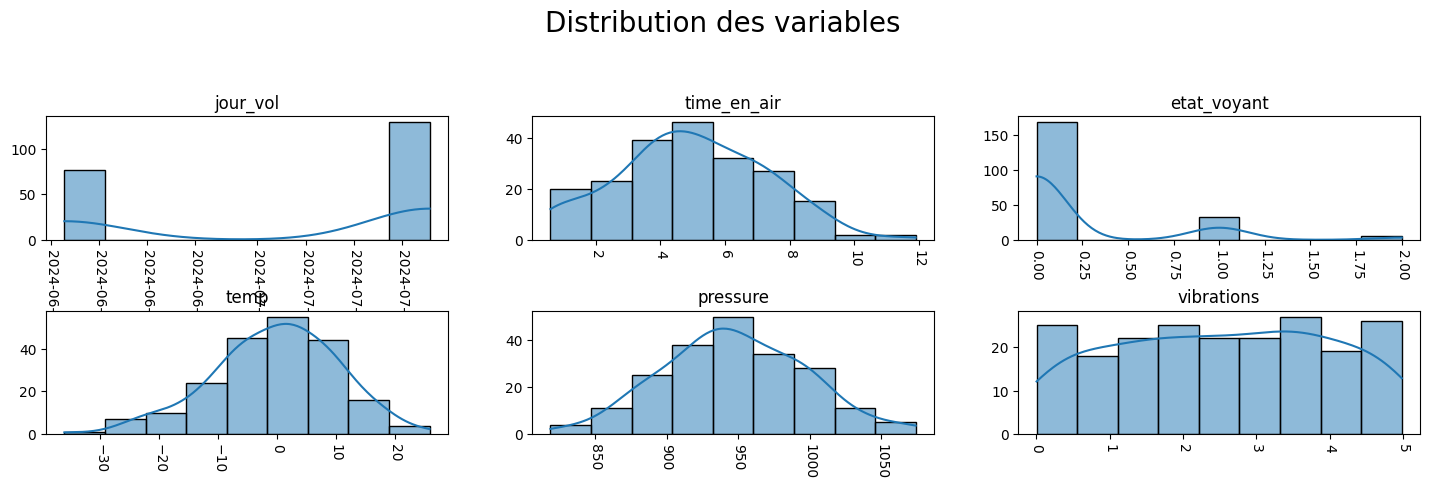

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
fig.suptitle('Distribution des variables', fontsize=20)
fig.tight_layout(pad=3.0)

for i, col in enumerate(['jour_vol', 'time_en_air', 'etat_voyant', 'temp', 'pressure', 'vibrations']):
    sns.histplot(df_logs_vols[col], bins='sturges', kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=-90)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')

plt.show()

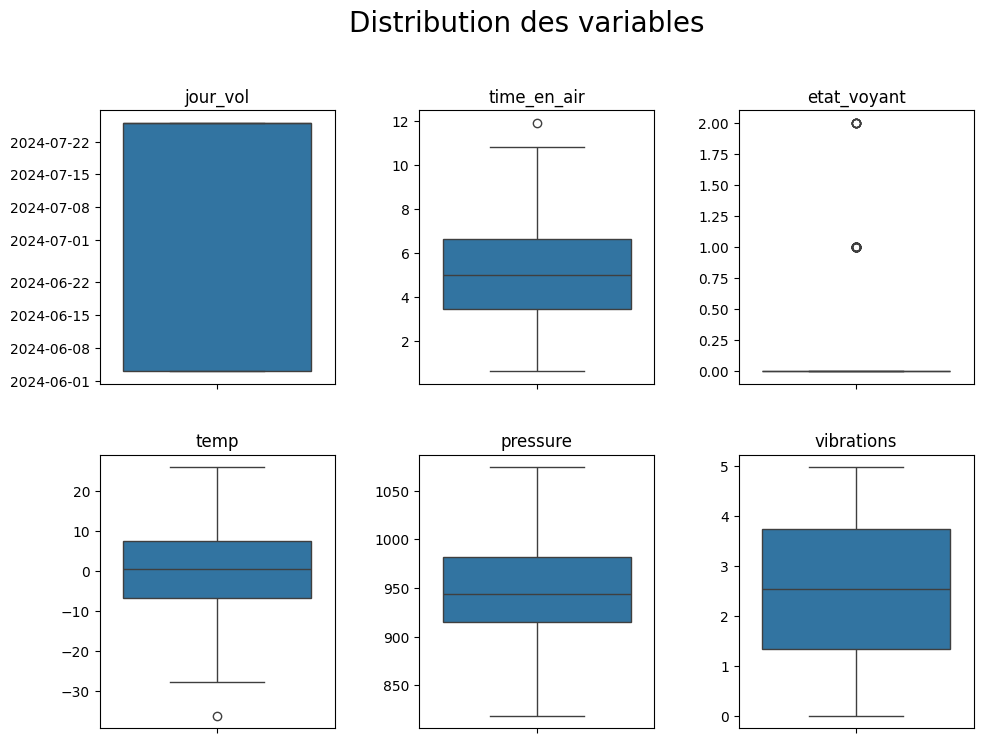

In [29]:
fig2, axes = plt.subplots(2, 3, figsize=(10, 8))
fig2.suptitle('Distribution des variables', fontsize=20)
fig2.tight_layout(pad=3.0)

for i, col in enumerate(['jour_vol', 'time_en_air', 'etat_voyant', 'temp', 'pressure', 'vibrations']):
    sns.boxplot(df_logs_vols[col],  ax=axes[i//3, i%3], showfliers=True)
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')

plt.show()

## Merge des dataFrame

In [30]:
df_aeronefs.head(1)

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint


In [31]:
df_composants.head(1)

,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout


In [32]:
df_degradations.head(1)

,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D003661E170_6353REAE170-E170_6353-02024-06-01,D003661,E170_6353,REAE170-E170_6353-0,53.308375,2024-06-01,False


In [33]:
df_logs_vols.head(1)

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant,temp,temp_unit,pressure,pressure_unit,vibrations,vibrations_unit,prediction_etat_voyant
0,V09736093,A320_6678,2024-06-03,3.8,"{'temp': '-1.9°C', 'pressure': '941.7 hPa', 'v...",0,-1.9,°C,941.7,hPa,3.739875,m/s²,0


In [34]:
merge1 = pd.merge(left= df_aeronefs, right= df_composants, how= 'outer', left_on= 'ref_aero', right_on= 'aero')

In [35]:
merge1.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout


In [36]:
merge1[merge1['ref_compo'].isna()]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout


In [37]:
# merge1 = merge1.dropna(subset=['ref_compo'])

In [38]:
merge1.isnull().sum()

ref_aero             0
type_model           0
debut_service        0
last_maint           0
en_maintenance       0
end_maint            0
ref_compo            0
categorie            0
aero                 0
desc_compo           0
lifespan             0
taux_usure_actuel    0
cout                 0
dtype: int64

In [39]:
merge2 = pd.merge(left= df_degradations, right= merge1, how= 'outer', left_on= 'compo_concerned', right_on= 'ref_compo')

In [40]:
merge2.head()

,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
0,D002776A320_1884AILA320-A320_1884-202024-06-01,D002776,A320_1884,AILA320-A320_1884-20,23.392968,2024-06-01,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D002776A320_1884AILA320-A320_1884-202024-07-18,D002776,A320_1884,AILA320-A320_1884-20,34.706268,2024-07-18,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D004565A320_1930AILA320-A320_1930-202024-06-03,D004565,A320_1930,AILA320-A320_1930-20,26.380652,2024-06-03,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D004565A320_1930AILA320-A320_1930-202024-07-26,D004565,A320_1930,AILA320-A320_1930-20,40.514384,2024-07-26,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D005634A320_2237AILA320-A320_2237-202024-06-01,D005634,A320_2237,AILA320-A320_2237-20,59.524060,2024-06-01,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
merge2.isna().sum()

clef                     0
ref_deg                  0
linked_aero              0
compo_concerned          0
usure_nouvelle           0
measure_day              0
need_replacement         0
ref_aero             20925
type_model           20925
debut_service        20925
last_maint           20925
en_maintenance       20925
end_maint            20925
ref_compo            20925
categorie            20925
aero                 20925
desc_compo           20925
lifespan             20925
taux_usure_actuel    20925
cout                 20925
dtype: int64

In [42]:
merge2[merge2['ref_aero'].isna()]

,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
0,D002776A320_1884AILA320-A320_1884-202024-06-01,D002776,A320_1884,AILA320-A320_1884-20,23.392968,2024-06-01,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D002776A320_1884AILA320-A320_1884-202024-07-18,D002776,A320_1884,AILA320-A320_1884-20,34.706268,2024-07-18,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D004565A320_1930AILA320-A320_1930-202024-06-03,D004565,A320_1930,AILA320-A320_1930-20,26.380652,2024-06-03,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D004565A320_1930AILA320-A320_1930-202024-07-26,D004565,A320_1930,AILA320-A320_1930-20,40.514384,2024-07-26,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D005634A320_2237AILA320-A320_2237-202024-06-01,D005634,A320_2237,AILA320-A320_2237-20,59.524060,2024-06-01,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,D001371E175_5586UNIE175-E175_5586-112024-07-26,D001371,E175_5586,UNIE175-E175_5586-11,22.254648,2024-07-26,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20921,D003723E175_6729UNIE175-E175_6729-112024-06-02,D003723,E175_6729,UNIE175-E175_6729-11,15.258520,2024-06-02,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20922,D003723E175_6729UNIE175-E175_6729-112024-07-26,D003723,E175_6729,UNIE175-E175_6729-11,32.542288,2024-07-26,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20923,D003759E175_6879UNIE175-E175_6879-112024-06-03,D003759,E175_6879,UNIE175-E175_6879-11,28.892944,2024-06-03,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
merge3 = pd.merge(left= df_logs_vols, right= merge2, how= 'outer', left_on= 'aero_linked', right_on= 'linked_aero')

In [44]:
pd.set_option("display.max_columns", None)

In [45]:
merge3.head(1)

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant,temp,temp_unit,pressure,pressure_unit,vibrations,vibrations_unit,prediction_etat_voyant,clef,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint,ref_compo,categorie,aero,desc_compo,lifespan,taux_usure_actuel,cout
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D002776A320_1884AILA320-A320_1884-202024-06-01,D002776,A320_1884,AILA320-A320_1884-20,23.392968,2024-06-01,False,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# drop des colonnes inutiles

merge3 = merge3.drop(['sensor_data', 'temp_unit', 'pressure_unit', 'vibrations_unit', 'ref_deg', 'linked_aero', 'ref_aero', 'ref_compo', 'aero'], axis=1)

merge3.isnull().sum()

ref_vol                    6750
aero_linked                6750
jour_vol                   6750
time_en_air                6750
etat_voyant                6750
temp                       6750
pressure                   6750
vibrations                 6750
prediction_etat_voyant     6750
clef                          0
compo_concerned               0
usure_nouvelle                0
measure_day                   0
need_replacement              0
type_model                25560
debut_service             25560
last_maint                25560
en_maintenance            25560
end_maint                 25560
categorie                 25560
desc_compo                25560
lifespan                  25560
taux_usure_actuel         25560
cout                      25560
dtype: int64

In [47]:
merge3.shape

(25560, 24)